# Introduction

## Standard imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import time
np.random.seed(int(time.time()))

## Specific imports

In [2]:
import matplotlib as mpl
from noise_analysis import noise_color
from scipy import stats
from noise_properties_plotting import noise_cmap_ww, noise_lim, PiecewiseNormalize, \
    PlotTimeseriesComparison, PlotNoiseColorComparison
from generate_timeseries import Timeseries
from noise_parameters import NOISE, MODEL

from matplotlib import font_manager
font_manager._rebuild()

## Settings figures

In [3]:
from elife_settings import set_elife_settings, ELIFE

set_elife_settings()

In [4]:
def timeseries_Sole(omega, mu, e, initcond, SISvector, rseed=0):
    Nspecies = len(omega) - 1
    
    print(np.append([0], initcond))
    print(['time'] + ['species_%d' % i for i in range(1, Nspecies+1)] + ['empty_sites'])
    
    ts = pd.DataFrame([np.append([0], initcond)], 
                      columns=['time', 'empty_sites'] + ['species_%d' % i for i in range(1, Nspecies+1)])

    x = np.copy(initcond)

    for t in range(500):
        if t%20 == 0:
            print(t)
            
        # initialize the so-called "interaction vector"
        y_virtual = x * SISvector

        # the number of interactions
        N_interactions = int(sum(y_virtual))

        # normalize for probabilities
        #y_virtual = y_virtual/sum(y_virtual)
        #y = x/sum(x)

        # random number generator
        randomx = WeightedRandomGenerator(x)
        randomy = WeightedRandomGenerator(y_virtual)

        for _ in range(N_interactions):
            # choose a random species A from virtual lattice
            A = randomx()
            B = randomy()

            ext = True

            # interaction between A and B
            if random.random() < abs(omega[A][B]):
                if omega[A][B] < 0:
                    if x[A] > 0:
                        x[0] += 1
                        x[A] -= 1
                        ext = False
                elif omega[A][B] > 0:
                    if x[0] > 0:
                        x[0] -= 1
                        x[A] += 1

            if A == 0: # possible immigration event
                C = random.randint(1, Nspecies)
                if random.random() < mu[C]:
                    x[0] -= 1
                    x[C] += 1
            else: # possible emigration event
                if x[A] > 0 and random.random() < e[A] and ext:
                    x[0] += 1
                    x[A] -= 1
        
        ts = ts.append(pd.DataFrame([np.append([t], x)], 
                      columns=['time', 'empty_sites'] + ['species_%d' % i for i in range(1, Nspecies+1)]))
    return ts


In [5]:
folder = 'results/extra_Faust_timeseries'

In [4]:
#nc_comp = pd.DataFrame(index=['species_%d' % i for i in range(1,101)])
#ss_comp = pd.DataFrame(index=['species_%d' % i for i in range(1,101)])

nc_2half = pd.DataFrame(index=['species_%d' % i for i in range(1,101)])
ss_2half = pd.DataFrame(index=['species_%d' % i for i in range(1,101)])
tot_2half = pd.DataFrame(index=['tot'])

for l in ['q', 'r', 'e']: #['a', 'q', 'r', 'e', 't']: #'a', 'q', 'r']: #['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'j', 'k']:
    if l == 'r' or l == 'q':
        end = 21
    for i in range(1, end):
        ts = pd.read_csv(folder + 'soi_%c_%d.csv' % (l, i))
                
        #nc_comp['%c_%d' % (l, i)] = noise_slope(ts)['slope_linear'].values
        #ss_comp['%c_%d' % (l, i)] = ts.mean()
                         
        nc_2half['%c_%d' % (l, i)] = noise_slope(ts.iloc[int(len(ts)/2):])['slope_linear'].values
        ss_2half['%c_%d' % (l, i)] = np.mean(ts.iloc[int(len(ts)/2):])
        tot_2half['%c_%d' % (l, i)] = np.mean(ts.iloc[int(len(ts)/2):,1:].sum(axis=1))

In [5]:
m = {'a' : np.repeat(0.01, 30), 
     'b' : 0.005*np.arange(1,11), 
     'c' : np.repeat(0.01,10), 
     'd' : np.repeat(0.1,10), 
     'e' : np.repeat(0.1,30), 
     'f' : np.repeat(0.1,10), 
     'g' : np.repeat(0.15,10), 
     'i' : 0.005*np.arange(1,11), 
     'j' : 0.01*np.arange(1,11), 
     'k' : 0.005*np.arange(1,11),
     'l' : np.repeat(0.05,10),
      'm' : np.repeat(0.05,10),
    'n' : 0.005*np.arange(1,11),
    'o' : np.repeat(0.1, 10),
    'p' : 0.005*np.arange(1,11),
    'q' : 0.01*np.arange(1,31),
    'r': np.repeat(0.02, 20),
    't' : 10**(-5 + 3/20*np.arange(1,21)),
    'u' : np.repeat(1e-5,20)}

e = {'a' : np.repeat(0.01, 30), 
     'b' : 0.005*np.arange(1,11), 
     'c' : np.repeat(0.01,10), 
     'd' : np.repeat(0.1,10), 
     'e' : np.repeat(0.1,30), 
     'f' : np.repeat(0.1,10), 
     'g' : np.repeat(0.15,10), 
     'i' : 0.005*np.arange(1,11), 
     'j' : 0.01*np.arange(1,11), 
     'k' : 0.005*np.arange(1,11),
     'l' : np.repeat(0.05,10),
    'm' : np.repeat(0.05,10),
    'n' : 0.005*np.arange(1,11),
    'o' : 0.005*np.arange(1,11),
    'p' : np.repeat(0.01, 10),
    'q' : np.repeat(0.01, 30),
    'r' : 0.01*np.arange(1,31),
    't' : np.repeat(0.01, 20),
    'u' : 0.01*np.arange(1,21),}

interaction = {'a' : 0.03*np.arange(1,31), 
       'b' : np.repeat(0.5,10),
       'c' : np.repeat(0.5,10),
       'd' : 0.1*np.arange(1,11), 
       'e' : 0.03*np.arange(1,31), 
       'f' : 0.2*np.arange(1,11), 
       'g' : 0.2*np.arange(1,11), 
       'i' : np.repeat(0.2,10),
       'j' : np.repeat(0.2,10),
       'k' : np.repeat(0.2,10), 
        'l' : 0.1*np.arange(1,11),
        'm' : 0.05*np.arange(1,11),
        'n' : 0.05*np.arange(1,11), 
        'o' : np.repeat(0.2, 10),
        'p' : np.repeat(0.2, 10),
        'q' : np.repeat(0.2, 30),
        'r' : np.repeat(0.2, 20),
        't' : np.repeat(0.2, 20),
        'u' : np.repeat(0.2, 20),}

c = {'a' : np.repeat(0.02,30),
     'b' : np.repeat(0.02,10),
     'c' : 0.02*np.arange(1,11), 
     'd' : np.repeat(0.1,10),
     'e' : np.repeat(0.02,10),
     'f' : np.repeat(0.02,10),
     'g' : np.repeat(0.02,10),
     'i' : np.repeat(0.02,10),
     'j' : np.repeat(0.02,10),
     'k' : np.repeat(0.02,10),
    'l' : np.repeat(0.02,10),
    'm' : np.repeat(0.02,10),
    'n' : np.repeat(0.02,10),
    'o' : np.repeat(0.02,10),
    'p' : np.repeat(0.02,10),
    'q' : np.repeat(0.02,30),
    'r' : np.repeat(0.02,20),
    't' : np.repeat(0.02,20),
    'u' : np.repeat(0.02,20),}

stoch = {}

for l in ['a', 'b', 'c', 'd', 'e', 'f', 'g',  'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 't']:
    stoch[l] = pd.read_csv(folder + 'soi_%c_stochasticity.csv' % l).values


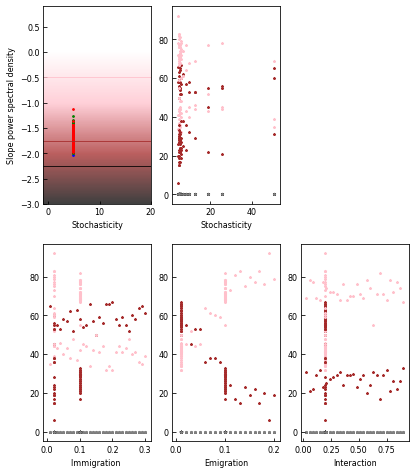

In [19]:
fig = plt.figure(figsize=(0.9*fullwidth,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

for l, color in zip(['q', 'r', 'e'], ['b', 'g', 'r', 'y', 'orange']):
    for column in [col for col in nc_2half.columns if l in col]:
        ns = nc_2half[column].values # '%c_%d' % (l, i+1)
                
        ax1.scatter(np.full_like(ns, stoch[l][i]), ns, s=3, c=color)
        
        for ax, x in zip([ax2, ax3, ax4, ax5], [stoch, m, e, interaction]):            
            for col, bds in zip(['k', 'brown', 'pink', 'grey'], 
                              [(-np.inf, -2.25), (-2.25, -1.75), (-1.75, -0.5), (-0.5,np.inf)]):
                ax.scatter(x[l][int(column.split('_')[-1])-1], sum(np.logical_and(bds[0] < ns, ns < bds[1])),
                   c = col, s=5, marker='.')
        
x = np.linspace(0.9, -3, 500).reshape([500,1])
if ax1.get_xscale() == 'log':
    ax1.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
else:
    ax1.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 20, -3, 0.9), aspect='auto', alpha=0.75)

ax1.axhline(y=-0.5, c='pink')    
ax1.axhline(y=-1.75, c='brown')
ax1.axhline(y=-2.25, c='k')

ax1.set_xlabel('Stochasticity')
ax1.set_ylabel('Slope power spectral density')

ax2.set_xlabel('Stochasticity')
ax3.set_xlabel('Immigration ')
ax4.set_xlabel('Emigration')
ax5.set_xlabel('Interaction')

plt.show()

0.36
0.36
1.08


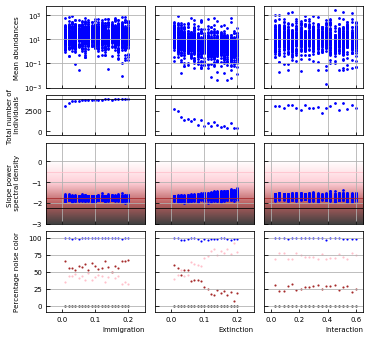

In [9]:
fig = plt.figure(figsize=(textwidth,5))

gs = gridspec.GridSpec(4,3,height_ratios=[2,1,2,2], wspace=0.1, hspace=0.1, top=0.95, 
                       bottom=0.1, left=0.15, right=0.95)

ax1a = fig.add_subplot(gs[0])
ax2a = fig.add_subplot(gs[1], sharey=ax1a)
ax3a = fig.add_subplot(gs[2], sharey=ax1a)
ax1_tot = fig.add_subplot(gs[3], sharex=ax1a)
ax2_tot = fig.add_subplot(gs[4], sharey=ax1_tot, sharex=ax2a)
ax3_tot = fig.add_subplot(gs[5], sharey=ax1_tot, sharex=ax3a)
ax1b = fig.add_subplot(gs[6], sharex=ax1a)
ax2b = fig.add_subplot(gs[7], sharex=ax2a, sharey=ax1b)
ax3b = fig.add_subplot(gs[8], sharex=ax3a, sharey=ax1b)
ax1c = fig.add_subplot(gs[9], sharex=ax1a)
ax2c = fig.add_subplot(gs[10], sharex=ax2a, sharey=ax1c)
ax3c = fig.add_subplot(gs[11], sharex=ax3a, sharey=ax1c)

ax1a.set_yscale('log')
#ax1a.set_xscale('log')
ax1a.set_ylim([1e-3,5e3])
ax1a.set_ylabel('Mean abundances')
ax1b.set_ylabel('Slope power \n spectral density')
ax1c.set_ylabel('Percentage noise color')
ax1_tot.set_ylabel('Total number of \n individuals')
ax1c.set_ylim([-10, 110])
ax1_tot.set_ylim([-500,4500])

for axc, l in zip([ax1c, ax2c, ax3c], ['Immigration', 'Extinction', 'Interaction']):
    axc.set_xlabel(l, ha='right', x=1)
    axc.grid(axis='x')

for l, axa, axb, axc, ax_tot, x in zip(['q', 'r', 'e'], [ax1a, ax2a, ax3a], 
                               [ax1b, ax2b, ax3b], [ax1c, ax2c, ax3c], 
                               [ax1_tot, ax2_tot, ax3_tot], [m, e, interaction]):
    for column in [col for col in nc_2half.columns if l in col]:
        #print(column)
        ns = nc_2half[column].values # '%c_%d' % (l, i+1)
        ss = ss_2half[column].values
        tot = tot_2half[column].values
                
        axa.scatter(np.full_like(ns, x[l][int(column.split('_')[-1])-1]), ss, s=3, c='blue')

        axb.scatter(np.full_like(ns, x[l][int(column.split('_')[-1])-1]), ns, s=3, c='blue')
        
        for col, bds in zip(['k', 'brown', 'pink', 'grey', 'b'], 
                              [(-np.inf, -2.25), (-2.25, -1.75), (-1.75, -0.5), (-0.5,np.inf), (-np.inf, np.inf)]):
                axc.scatter(x[l][int(column.split('_')[-1])-1], sum(np.logical_and(bds[0] < ns, ns < bds[1])),
                   c = col, s=5, marker='.')
        
        ax_tot.scatter([x[l][int(column.split('_')[-1])-1]], tot, c='b', s=3)

    xx = np.linspace(0.9, -3, 500).reshape([500,1])
    if axb.get_xscale() == 'log':
        axb.imshow(xx, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                   extent=(min(x[l])*0.5, max(x[l])*2, -3, 0.9), aspect='auto', alpha=0.75)
    else:
        print(max(x[l])*1.2)
        axb.imshow(xx, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                   extent=(-max(x[l])*0.2, max(x[l])*1.2, -3, 0.9), aspect='auto', alpha=0.75)
    
    axb.axhline(y=-0.5, c='pink')    
    axb.axhline(y=-1.75, c='brown')
    axb.axhline(y=-2.25, c='k')
    axb.grid()
    axa.grid()
    axc.grid()
    ax_tot.grid(axis='x')

    ax_tot.axhline(y=4000, c='k')
    
    for ax in [axa, axb, ax_tot]:
        ax.tick_params(axis='both', bottom=True, labelbottom=False)
    if l != 'q':
        for ax in [axa, axb, axc, ax_tot]:
            ax.tick_params(axis='both', left=True, labelleft=False)
    if l == 'r':
        axc.set_xlim([-0.05, 0.25])
    if l == 'q':
        axc.set_xlim([-0.05, 0.25])
    if l == 'e':
        axc.set_xlim([-0.05, 0.65])
    
fig.align_labels()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)

l = 'r'
x = e

for column in [col for col in nc_2half.columns if 'r' in col]:
    tot = tot_2half[column].values

    ax.scatter(e[l][int(column.split('_')[-1])-1], - e[l][int(column.split('_')[-1])-1])       

plt.show()

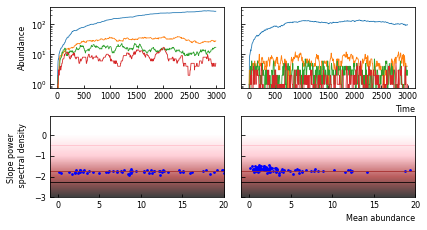

In [29]:
fig = plt.figure(figsize=(0.9*fullwidth,3.5), tight_layout=True)

gs = gridspec.GridSpec(2,2, hspace=0.35, wspace=0.1)

for i, j, column in zip([0,1], [2,3], ['r_1', 'r_15']):
    ts = pd.read_csv(folder + 'soi_%s.csv' % column)

    ax_ts = fig.add_subplot(gs[i], sharey=ax_ts if i > 0 else None)
    plot_timeseries_comparison([ts], fig=ax_ts, composition=['ts'])
    
    if i == 1:
        ax_ts.set_ylabel('')
        ax_ts.tick_params(axis='both', left=True, labelleft=False)
    else:
        ax_ts.set_xlabel('')
    
    ax_nc = fig.add_subplot(gs[j], sharey=ax_nc if i > 0 else None)

    ax_nc.scatter(ss_2half[column].values, nc_2half[column].values, s=3, c='b')

    x = np.linspace(0.9, -3, 500).reshape([500,1])
    if ax_nc.get_xscale() == 'log':
        ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
    else:
        ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 20, -3, 0.9), aspect='auto', alpha=0.75)

    ax_nc.axhline(y=-0.5, c='pink')    
    ax_nc.axhline(y=-1.75, c='brown')
    ax_nc.axhline(y=-2.25, c='k')
    
    if i == 1:
        ax_nc.set_ylabel('')
        ax_nc.tick_params(axis='both', left=True, labelleft=False)
    else:
        ax_nc.set_ylabel('Slope power \n spectral density')

ax_nc.set_xlabel('Time', ha='right', x=1)
ax_nc.set_xlabel('Mean abundance', ha='right', x=1)

fig.align_labels()
plt.show()

0 1 4
1 1 4
0 2 4
1 2 4
0 3 4
1 3 4


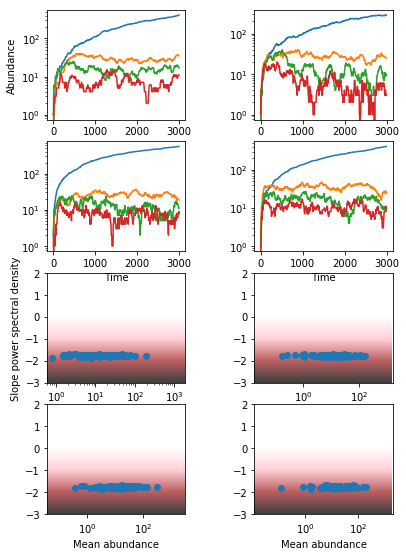

In [81]:
plot_timeseries_comparison([pd.read_csv(folder + 'soi_i_%d.csv' % i) for i in range(1,5)], 
                           composition=['ts', 'nc'], vertical=False)
plt.show()

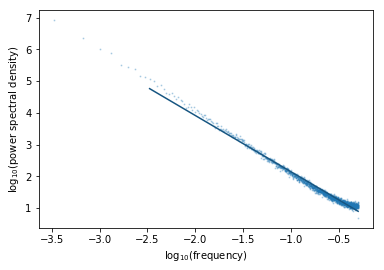

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

example_noise_fit(ax, pd.read_csv(folder + 'soi_c_1.csv').species_13) # species_13 is the most abudant
plt.show()

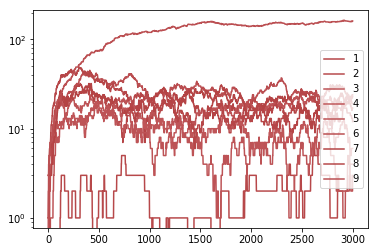

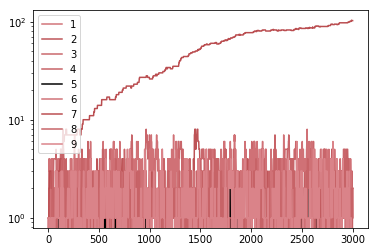

In [77]:
tsi = 'r_1'

ts = pd.read_csv(folder + 'soi_%s.csv' % tsi)

for i in range(1,10):
    c = noise_cmap((nc.loc['species_%d' % i, tsi] + 3)/3)
    plt.plot(ts['time'], ts['species_%d' % i], c=c, label=i)
plt.legend()
plt.yscale('log')
plt.show()

tsi = 'r_20'

ts = pd.read_csv(folder + 'soi_%s.csv' % tsi)

for i in range(1,10):
    c = noise_cmap((nc.loc['species_%d' % i, tsi] + 3)/3)
    plt.plot(ts['time'], ts['species_%d' % i], c=c, label=i)
plt.legend()
plt.yscale('log')
plt.show()

In [10]:
params = {}

N = 1

steadystate = np.array(1.5).reshape([1,1])

# no interaction
omega = np.zeros([N, N]); np.fill_diagonal(omega, -1)

params['interaction_matrix'] = omega

# no immigration
params['immigration_rate'] = np.zeros([N, 1])

# different growthrates determined by the steady state
params['growthrate'] = - (omega).dot(steadystate)

params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)

params['noise'] = 9e-1

params['noise_linear'] = 1e-1
params['noise_sqrt'] = 1e-2

ts = run_timeseries_noise(params, 
                        noise_implementation = NOISE.LANGEVIN_LINEAR, 
                        dt = 0.01, tskip=4, T=100.0, seed=int(time.time()))


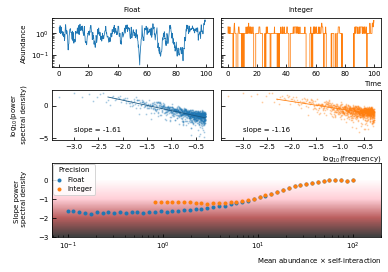

In [12]:
ts2 = ts.copy()
ts2['species_1'] = ts2['species_1'].round()

fig = plt.figure(figsize=(textwidth,3.5))

gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1.5], 
                       wspace=0.05, hspace=0.4, top=0.95, left=0.12, right=0.95, bottom=0.08)

for i, tsi, title in zip(np.arange(2), [ts, ts2], ['Float', 'Integer']):    
    if i == 0:
        ax = fig.add_subplot(gs[0,i])
        ax2 = fig.add_subplot(gs[1,i])
    else:
        ax = fig.add_subplot(gs[0,i], sharey=ax)
        ax2 = fig.add_subplot(gs[1,i], sharey=ax2)
        
    plot_timeseries_comparison([tsi], composition=['ts'], fig=ax)
    plot_timeseries_comparison([tsi], composition=['psd'], fig=ax2)
        
    ns = noise_slope(tsi).loc['species_1', 'slope_linear']
    
    ax.set_title(title)
    
    ax2.annotate('slope = %.2f' % ns, xy=(-3,-4), xytext = (-3,-4))
    
    if i == 1:
        for l in ax.lines:
            l.set_color('#ff7f0e')
        for l in ax2.lines:
            l.set_color('#ff7f0e')
            
    if i > 0:
        ax.set_ylabel('')
        ax2.set_ylabel('')
        ax.tick_params(axis='both', left=True, labelleft=False)
        ax2.tick_params(axis='both', left=True, labelleft=False)
        ax.set_xlabel('Time', ha='right', x=1)
        ax2.set_xlabel('log$_{10}$(frequency)', ha='right', x=1)
    else:
        ax.set_xlabel('')
        ax2.set_xlabel('')
        ax2.set_ylabel('log$_{10}$(power \n spectral density)')
# titles=

nc_int = pd.read_csv('noise_color_float_int.csv')

ax = fig.add_subplot(gs[-1,:])

ax.scatter(nc_int['ss'], nc_int['noise_float'], label='Float')
ax.scatter(nc_int['ss'], nc_int['noise_integer'], label='Integer')

ax.set_xscale('log')
ax.legend(title='Precision', loc=2)

x = np.linspace(0.9, -3, 500).reshape([500,1])
if ax.get_xscale() == 'log':
    ax.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
else:
    ax.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 200, -3, 0.9), aspect='auto', alpha=0.75)

ax.set_xlabel(r'Mean abundance $\times$ self-interaction', x=1, ha='right')
ax.set_ylabel('Slope power \n spectral density')

fig.align_labels()

plt.show()

In [249]:
new = False

if new:
    
    sss = np.logspace(-1, 2, 50)

    nc_int = pd.DataFrame({'ss' : sss})

    nc_int['noise_float'] = np.zeros_like(sss)
    nc_int['noise_integer'] = np.zeros_like(sss)

    for row in nc_int.index:
        slopes_float = np.zeros(50)
        slopes_int = np.zeros(50)

        for i in range(50):
            params = {}

            N = 1

            steadystate = np.array(nc_int.loc[row, 'ss']).reshape([1,1])

            # no interaction
            omega = np.zeros([N, N]); np.fill_diagonal(omega, -1)

            params['interaction_matrix'] = omega

            # no immigration
            params['immigration_rate'] = np.zeros([N, 1])

            # different growthrates determined by the steady state
            params['growthrate'] = - (omega).dot(steadystate)

            params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)

            params['noise'] = 9e-1

            params['noise_linear'] = 1e-1
            params['noise_sqrt'] = 1e-2

            ts = run_timeseries_noise(params, 
                                    noise_implementation = NOISE.LANGEVIN_LINEAR,
                                    dt = 0.01, tskip=4, T=100.0, seed=int(time.time()))

            slopes_float[i] = noise_slope(ts).loc['species_1', 'slope_linear']

            ts = ts.round()

            slopes_int[i] = noise_slope(ts).loc['species_1', 'slope_linear']

        nc_int.loc[row, 'noise_float'] = np.mean(slopes_float)
        nc_int.loc[row, 'noise_integer'] = np.mean(slopes_int)
    
    nc_int.to_csv('noise_color_float_int.csv')

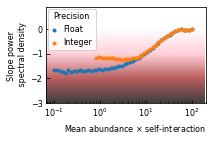

In [51]:
nc_int = pd.read_csv('noise_color_float_int.csv')

fig = plt.figure(figsize=(3,2), tight_layout=True)
ax = fig.add_subplot(111)

ax.scatter(nc_int['ss'], nc_int['noise_float'], label='Float')
ax.scatter(nc_int['ss'], nc_int['noise_integer'], label='Integer')

ax.set_xscale('log')
ax.legend(title='Precision', loc=2)

x = np.linspace(0.9, -3, 500).reshape([500,1])
if ax.get_xscale() == 'log':
    ax.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
else:
    ax.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 200, -3, 0.9), aspect='auto', alpha=0.75)

ax.set_xlabel(r'Mean abundance $\times$ self-interaction', x=1, ha='right')
ax.set_ylabel('Slope power \n spectral density')

plt.show()

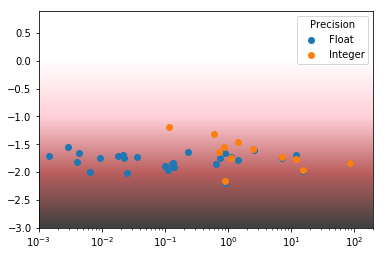

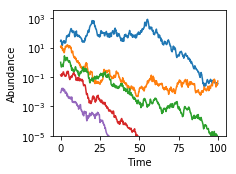

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
#axi = fig.add_subplot(212, sharey=axf, sharex=axf)

params = {}

N = 30

steadystate = np.logspace(-2,2,N).reshape([N,1])

# no interaction
omega = np.zeros([N, N]); np.fill_diagonal(omega, 0)

params['interaction_matrix'] = omega

# no immigration
params['immigration_rate'] = np.zeros([N, 1])

# different growthrates determined by the steady state
params['growthrate'] = - (omega).dot(steadystate)

params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)

params['noise'] = 5e-1

params['noise_linear'] = 1e-1
params['noise_sqrt'] = 1e-2

ts = run_timeseries_noise(params, 
                        noise_implementation = NOISE.LANGEVIN_LINEAR,
                        dt = 0.01, tskip=4, T=100.0, seed=int(time.time()))

slopes = noise_slope(ts)['slope_linear']

ax.scatter(np.mean(ts)[1:], slopes, label='Float')

plot_timeseries_comparison([ts], composition=['ts'])

ts = ts.round()

slopes_int = noise_slope(ts)['slope_linear']

ax.scatter(np.mean(ts)[1:], slopes_int, label='Integer')
ax.set_xscale('log')
ax.set_xlim([1e-3, 2e2])

ax.legend(title='Precision')

x = np.linspace(0.9, -3, 500).reshape([500,1])
if ax.get_xscale() == 'log':
    ax.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
else:
    ax.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 200, -3, 0.9), aspect='auto', alpha=0.75)

plt.show()

i 2.5
i 2.1
i 1.7
i 1.3
i 0.9
i 0.5


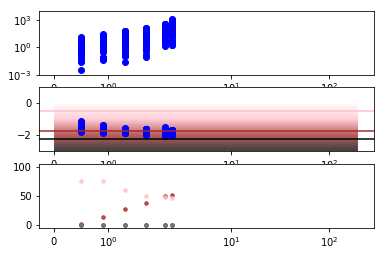

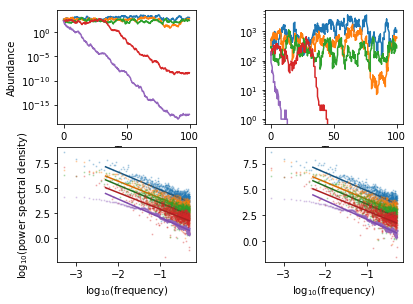

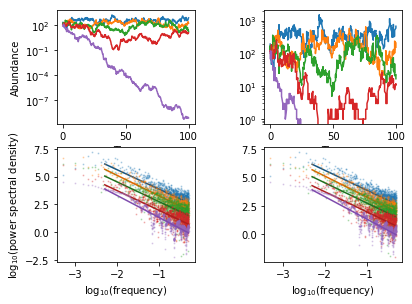

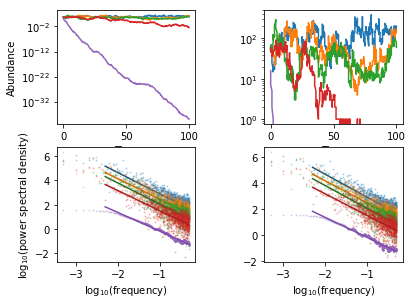

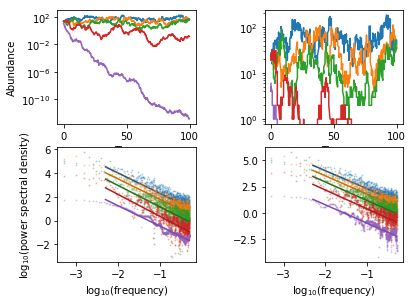

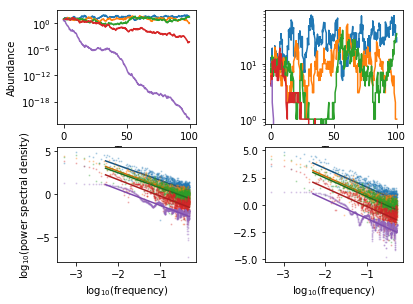

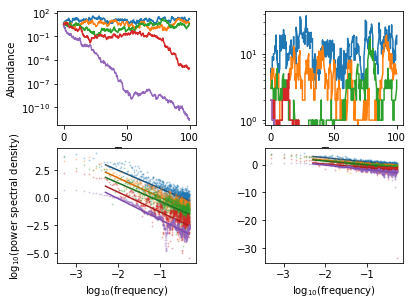

In [139]:
fig = plt.figure()
ax_ma = fig.add_subplot(311)
ax_nc = fig.add_subplot(312, sharex=ax_ma)
ax_pn = fig.add_subplot(313, sharex=ax_ma)

for i in np.linspace(2.5, 0.5, 6):
#for i in np.logspace(-5, 0, 6):
    print("i", i)
    
    params = {}

    N = 50
    
    steadystate = np.ones([N,1])
    
    # no interaction
    # omega = np.random.normal(0,0.5,[N, N]) * np.random.choice([0,1], [N,N], p=[0.98, 0.02]) 
    found = False
    
    omega = np.random.normal(-0.01, 0.02, [N, N])
    np.fill_diagonal(omega, -0.2)

    # no immigration
    params['immigration_rate'] = np.full_like([N, 1])

    # different growthrates determined by the steady state
    #g = np.random.uniform(0, i, [N,1])
    g = #- (omega).dot(steadystate)
    params['growthrate'] = g
    
    steadystate = np.random.normal(10**i, 10**(i-0.5), N).reshape([N,1])
    params['interaction_matrix'] = omega / steadystate
    
    params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)

    params['noise'] = 5e-1

    params['noise_linear'] = 1e-1
    params['noise_sqrt'] = 1e-2
    
    ts_o = run_timeseries_noise(params, 
                            noise_implementation = NOISE.LANGEVIN_LINEAR,
                            dt = 0.01, tskip=4, T=100.0, seed=int(time.time()))
        
    ts = ts_o.round()
    
    plot_timeseries_comparison([ts_o, ts], composition=['ts', 'psd'])

    slopes = noise_slope(ts)['slope_linear']
    
    ax_ma.scatter(np.full_like(slopes, i), np.mean(ts)[1:], c='b')
    ax_nc.scatter(np.full_like(slopes, i), slopes, c='b')
    
    #print(slopes.values, np.sum(np.isnan(slopes)))
    
    for col, bds in zip(['k', 'brown', 'pink', 'grey'], 
                              [(-np.inf, -2.25), (-2.25, -1.75), (-1.75, -0.5), (-0.5,np.inf)]):
        ax_pn.scatter([i], sum(np.logical_and(bds[0] < slopes, slopes < bds[1])) / N * 100,
                   c = col, s=50, marker='.', alpha=0.8)
   
x = np.linspace(0.9, -3, 500).reshape([500,1])
if ax.get_xscale() == 'log':
    ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
else:
    ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 200, -3, 0.9), aspect='auto', alpha=0.75)

ax_nc.axhline(y=-0.5, c='pink')    
ax_nc.axhline(y=-1.75, c='brown')
ax_nc.axhline(y=-2.25, c='k')
ax_nc.grid(axis='x')
ax_nc.grid(axis='x')
    
ax_nc.set_ylim([-3,1])
ax_pn.set_ylim([-5,105])

ax_nc.set_xscale('symlog')
ax_pn.set_xscale('symlog')
ax_ma.set_xscale('symlog')
ax_ma.set_yscale('log')
ax_ma.set_ylim([1e-3, 1e4])

plt.show()

i 0.001
i 0.0430526315789
i 0.0851052631579
i 0.127157894737
i 0.169210526316
i 0.211263157895
i 0.253315789474
i 0.295368421053
i 0.337421052632
i 0.379473684211
i 0.421526315789
i 0.463578947368
i 0.505631578947
i 0.547684210526
i 0.589736842105
i 0.631789473684
i 0.673842105263
i 0.715894736842
i 0.757947368421
i 0.8


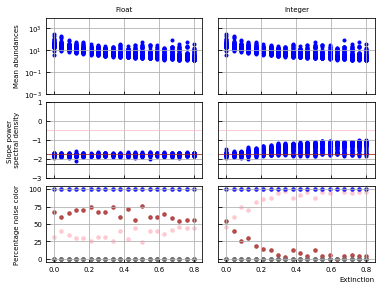

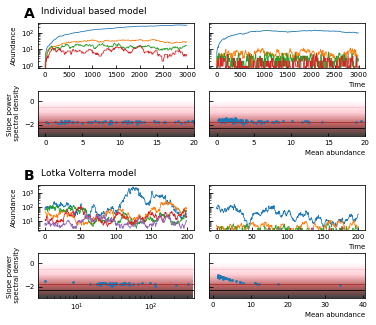

In [19]:
fig = plt.figure(figsize=(textwidth,4))

gs = gridspec.GridSpec(3,2, top=0.95,bottom=0.1,left=0.12,right=0.95, wspace=0.1, hspace=0.1)

ax_ma_f = fig.add_subplot(gs[0])
ax_nc_f = fig.add_subplot(gs[2], sharex=ax_ma_f)
ax_pn_f = fig.add_subplot(gs[4], sharex=ax_ma_f)

ax_ma_i = fig.add_subplot(gs[1], sharey=ax_ma_f)
ax_nc_i = fig.add_subplot(gs[3], sharex=ax_ma_i, sharey=ax_nc_f)
ax_pn_i = fig.add_subplot(gs[5], sharex=ax_ma_i, sharey=ax_pn_f)

for ax in [ax_ma_i, ax_nc_i, ax_pn_i]:
    ax.tick_params(axis='both', left=True, labelleft=False)
    
for ax in [ax_ma_f, ax_nc_f, ax_ma_i, ax_nc_i]:
    ax.tick_params(axis='both', bottom=True, labelbottom=False)

for ax in [ax_ma_f, ax_nc_f, ax_ma_i, ax_nc_i, ax_pn_f, ax_pn_i]:
    ax.grid()
    
ax_ma_f.set_ylabel('Mean abundances')
ax_nc_f.set_ylabel('Slope power \n spectral density')
ax_pn_f.set_ylabel('Percentage noise color')

ax_pn_i.set_xlabel('Extinction', ha='right', x=1)

ax_ma_f.set_title('Float')
ax_ma_i.set_title('Integer')

fig2 = plt.figure(figsize=(textwidth,4.5), tight_layout=True)

gs1 = gridspec.GridSpec(2,2, hspace=0.5, wspace=0.1, top=0.95, bottom=0.6, right=0.95)
gs2 = gridspec.GridSpec(2,2, hspace=0.5, wspace=0.1, top=0.45, bottom=0.1, right=0.95)

for i, j, column in zip([0,1], [2,3], ['r_1', 'r_15']):
    ts = pd.read_csv(folder + 'soi_%s.csv' % column)

    ax_ts = fig2.add_subplot(gs1[i], sharey=ax_ts if i > 0 else None)
    
    if i == 0:
        ax_ts.text(-0.02, 1.35, 'A', transform=ax_ts.transAxes,
          fontsize=14, fontweight='bold', va='top', ha='right')
        ax_ts.text(0.02, 1.35, 'Individual based model', transform=ax_ts.transAxes, 
            fontsize=9, va='top', ha='left')

    plot_timeseries_comparison([ts], fig=ax_ts, composition=['ts'])
    
    if i == 1:
        ax_ts.set_ylabel('')
        ax_ts.tick_params(axis='both', left=True, labelleft=False)
    else:
        ax_ts.set_xlabel('')
    
    ax_nc = fig2.add_subplot(gs1[j], sharey=ax_nc if i > 0 else None)

    ax_nc.scatter(ss_2half[column].values, nc_2half[column].values, s=3)

    x = np.linspace(0.9, -3, 500).reshape([500,1])
    if ax_nc.get_xscale() == 'log':
        ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                     extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
    else:
        ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                     extent=(-1, 20, -3, 0.9), aspect='auto', alpha=0.75)

    ax_nc.axhline(y=-0.5, c='pink')    
    ax_nc.axhline(y=-1.75, c='brown')
    ax_nc.axhline(y=-2.25, c='k')
    
    if i == 1:
        ax_nc.set_ylabel('')
        ax_nc.tick_params(axis='both', left=True, labelleft=False)
    else:
        ax_nc.set_ylabel('Slope power \n spectral density')

ax_nc.set_xlabel('Time', ha='right', x=1)
ax_nc.set_xlabel('Mean abundance', ha='right', x=1)

ax_ts1 = fig2.add_subplot(gs2[0])
ax_ts2 = fig2.add_subplot(gs2[1], sharey=ax_ts1)
ax_nc1 = fig2.add_subplot(gs2[2])
ax_nc2 = fig2.add_subplot(gs2[3], sharey=ax_nc1)

ax_ts1.text(-0.02, 1.35, 'B', transform=ax_ts1.transAxes,
          fontsize=14, fontweight='bold', va='top', ha='right')
ax_ts.text(0.02, 1.35, 'Lotka Volterra model', transform=ax_ts1.transAxes, 
        fontsize=9, va='top', ha='left')
    
ax_nc2.set_xlabel('Mean abundance', ha='right', x=1)
ax_nc1.set_ylabel('Slope power \n spectral density')

ax_nc1.set_xscale('log')

Np = 20

for ii, i in enumerate(np.linspace(0.001, 0.8, Np)): # np.logspace(-3, 0.5, 6):
    print("i", i)
        
    params = {}

    N = 50

    # no interaction
    omega = np.random.normal(0,0.1,[N, N]) * np.random.choice([0,1], [N,N], p=[0.99, 0.01]) 
    np.fill_diagonal(omega, -0.02)

    params['immigration_rate'] = np.full([N,1], 0.02)

    # different growthrates determined by the steady state
    g = -np.random.uniform(0, i, N).reshape([N,1])
    params['growthrate'] = g

    steadystate = np.ones([N,1])
    params['interaction_matrix'] = omega

    params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.01,steadystate.shape)

    params['noise'] = 3e-1

    params['noise_linear'] = 3e-1
    params['noise_sqrt'] = 1e-2

    params['initial_condition'] = run_timeseries_noise(params, 
                            noise_implementation = NOISE.LANGEVIN_LINEAR,
                            dt = 0.01, tskip=4, T=20.0, seed=int(time.time()), ts=False)

    ts_f = run_timeseries_noise(params, 
                            noise_implementation = NOISE.LANGEVIN_LINEAR,
                            dt = 0.01, tskip=4, T=200.0, seed=int(time.time()))
    
    ts_f = ts_f*50
    
    ts_f.time /= 50
    
    ts_i = ts_f.round()
    
    slopes_f = noise_slope(ts_f)['slope_linear']
    slopes_i = noise_slope(ts_i)['slope_linear']
    
    if ii == 0:
        plot_timeseries_comparison([ts_i], composition=['ts'], fig=ax_ts1)
        ax_ts1.set_xlabel('')
        ax_nc1.scatter(ts_i.mean()[1:], slopes_i, s=3)
        x = np.linspace(0.9, -3, 500).reshape([500,1])
        if ax.get_xscale() == 'log':
            ax_nc1.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                          extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
        else:
            ax_nc1.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                          extent=(-1, 1.2*max(ts_i.mean()[1:]), -3, 0.9), aspect='auto', alpha=0.75)
        
    if ii == Np-1:
        plot_timeseries_comparison([ts_i], composition=['ts'], fig=ax_ts2)
        ax_nc2.scatter(ts_i.mean()[1:], slopes_i, s=3)
        x = np.linspace(0.9, -3, 500).reshape([500,1])
        if ax.get_xscale() == 'log':
            ax_nc2.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                          extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
        else:
            ax_nc2.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], 
                          extent=(-1, 1.2*max(ts_i.mean()[1:]), -3, 0.9), aspect='auto', alpha=0.75)
        ax_ts2.set_ylabel('')
        ax_nc2.set_ylabel('')
        ax_ts2.tick_params(axis='both', left=True, labelleft=False)
        ax_nc2.tick_params(axis='both', left=True, labelleft=False)

    ax_ma_f.scatter(np.full_like(slopes_f, i), np.mean(ts_f)[1:], c='b')
    ax_nc_f.scatter(np.full_like(slopes_f, i), slopes_f, c='b')
    
    ax_ma_i.scatter(np.full_like(slopes_i, i), np.mean(ts_i)[1:], c='b')
    ax_nc_i.scatter(np.full_like(slopes_i, i), slopes_i, c='b')
    
    #print(slopes.values, np.sum(np.isnan(slopes)))
    
    for col, bds in zip(['k', 'brown', 'pink', 'grey', 'b'], 
                              [(-np.inf, -2.25), (-2.25, -1.75), (-1.75, -0.5), (-0.5,np.inf), (-np.inf, np.inf)]):
        ax_pn_f.scatter([i], sum(np.logical_and(bds[0] < slopes_f, slopes_f < bds[1])) / N * 100,
                   c = col, s=50, marker='.', alpha=0.8)
        ax_pn_i.scatter([i], sum(np.logical_and(bds[0] < slopes_i, slopes_i < bds[1])) / N * 100,
                   c = col, s=50, marker='.', alpha=0.8)
   
#x = np.linspace(0.9, -3, 500).reshape([500,1])
#if ax.get_xscale() == 'log':
#    ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
#else:
#    ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 200, -3, 0.9), aspect='auto', alpha=0.75)

for ax_nc in [ax_nc_f, ax_nc_i]:
    ax_nc.axhline(y=-0.5, c='pink')    
    ax_nc.axhline(y=-1.75, c='brown')
    ax_nc.axhline(y=-2.25, c='k')
    ax_nc.grid(axis='x')
    ax_nc.grid(axis='x')

    ax_nc.set_ylim([-3,1])

for ax_pn in [ax_pn_f, ax_pn_f]:
    ax_pn.set_ylim([-5,105])

for ax_ma in [ax_ma_f, ax_ma_f]:
    #ax_ma.set_xscale('log')
    ax_ma.set_yscale('log')
    ax_ma.set_ylim([1e-3, 1e4])

for ax_nc in [ax_nc1, ax_nc2]:
    ax_nc.axhline(y=-0.5, c='pink')    
    ax_nc.axhline(y=-1.75, c='brown')
    ax_nc.axhline(y=-2.25, c='k')

fig.align_labels()
#fig2.align_labels()

plt.show()

plt.figure(1)
plt.plot([1,2,3],[1,2,3])

plt.figure(2)
plt.plot([5,1,2],[4,6,3])

plt.figure(1)
plt.savefig('figures/testfig1.pdf')
plt.figure(2)
plt.savefig('figures/testfig2.pdf')

i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19


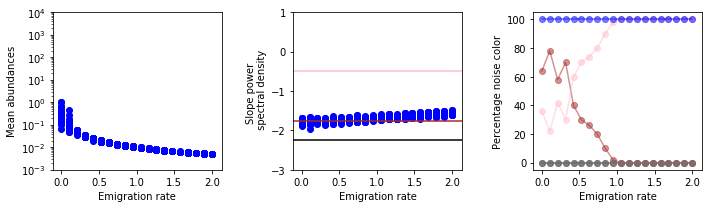

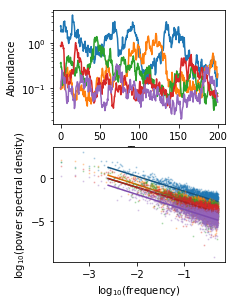

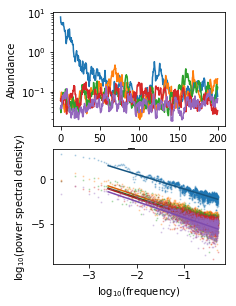

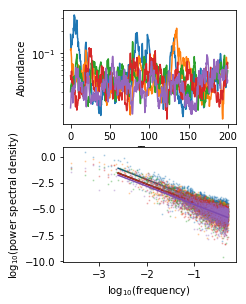

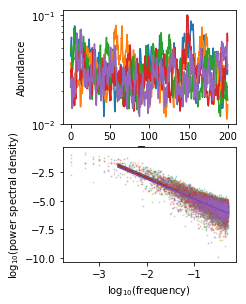

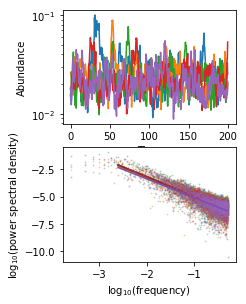

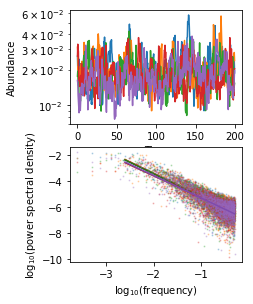

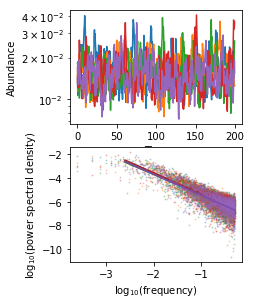

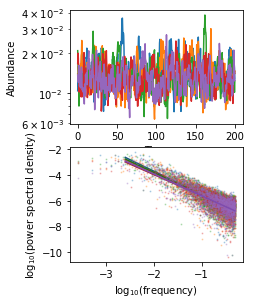

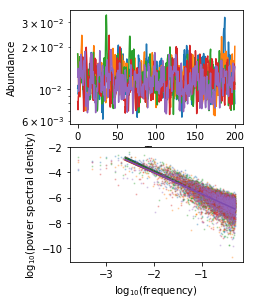

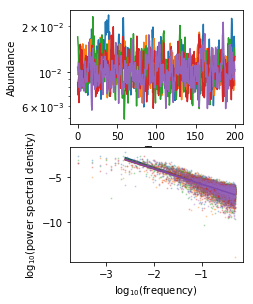

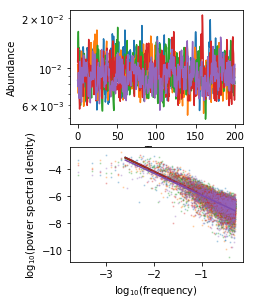

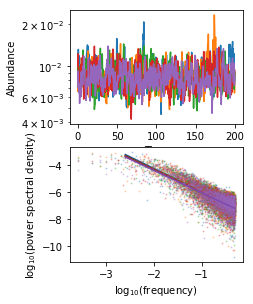

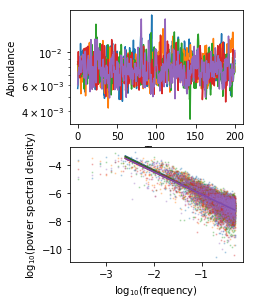

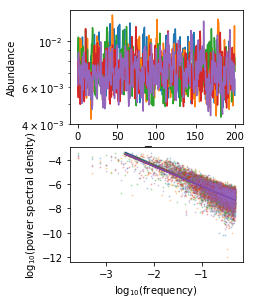

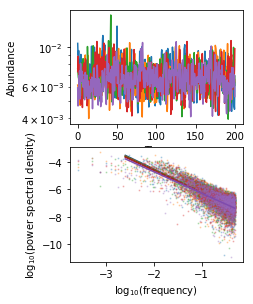

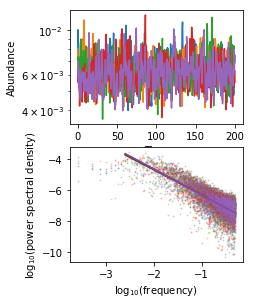

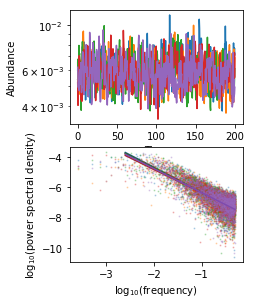

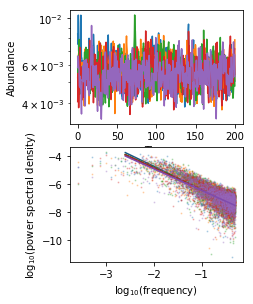

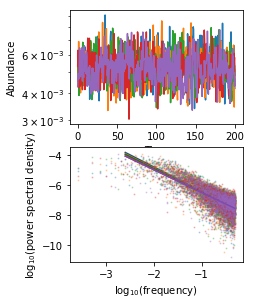

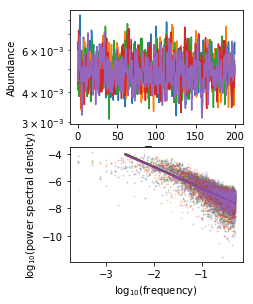

In [153]:
if False:
    fig = plt.figure(figsize=(10,10))

    ax_ma_e = fig.add_subplot(321)
    ax_nc_e = fig.add_subplot(323, sharex=ax_ma_e)
    ax_pn_e = fig.add_subplot(325, sharex=ax_ma_e)

    ax_ma_i = fig.add_subplot(322)
    ax_nc_i = fig.add_subplot(324, sharex=ax_ma_e)
    ax_pn_i = fig.add_subplot(326, sharex=ax_ma_e)
    
    js = np.arange(2)
    
    for ax_nc in [ax_nc_e, ax_nc_i]:
        ax_nc.axhline(y=-0.5, c='pink')    
        ax_nc.axhline(y=-1.75, c='brown')
        ax_nc.axhline(y=-2.25, c='k')
        ax_nc.grid(axis='x')
        ax_nc.grid(axis='x')

        ax_nc.set_ylim([-3,1])

    for ax_pn in [ax_pn_e, ax_pn_i]:
        ax_pn.set_ylim([-5,105])

    for ax_ma in [ax_ma_e, ax_ma_i]:
        #ax_ma.set_xscale('log')
        ax_ma.set_yscale('log')
        ax_ma.set_ylim([1e-3, 1e4])
else:
    fig = plt.figure(figsize=(10,3), tight_layout=True)
    
    gs = gridspec.GridSpec(1,3, wspace=0.2)
    
    ax_ma_e = fig.add_subplot(131)
    ax_nc_e = fig.add_subplot(132, sharex=ax_ma_e)
    ax_pn_e = fig.add_subplot(133, sharex=ax_ma_e)
    
    ax_nc_e.axhline(y=-0.5, c='pink')    
    ax_nc_e.axhline(y=-1.75, c='brown')
    ax_nc_e.axhline(y=-2.25, c='k')
    ax_nc_e.grid(axis='x')
    ax_nc_e.grid(axis='x')

    ax_nc_e.set_ylim([-3,1])

    ax_pn_e.set_ylim([-5,105])

    #ax_ma.set_xscale('log')
    ax_ma_e.set_yscale('log')
    ax_ma_e.set_ylim([1e-3, 1e4])
    
    ax_ma_e.set_ylabel('Mean abundances')
    ax_nc_e.set_ylabel('Slope power \n spectral density')
    ax_pn_e.set_ylabel('Percentage noise color')
    ax_ma_e.set_xlabel('Emigration rate')
    ax_nc_e.set_xlabel('Emigration rate')
    ax_pn_e.set_xlabel('Emigration rate')
    
    js = [0]

Np = 20 # number of points

for j in js:
    if j == 0:
        ax_ma = ax_ma_e
        ax_nc = ax_nc_e
        ax_pn = ax_pn_e
    else:
        ax_ma = ax_ma_i
        ax_nc = ax_nc_i
        ax_pn = ax_pn_i
        
    cols = np.zeros([5,Np])
    x = np.linspace(0, 2, Np)
    
    for i, var in enumerate(x): # np.logspace(-3, 0.5, 6):
        print("i", i)

        params = {}

        N = 50

        # no interaction
        omega = np.random.normal(0,0.2,[N, N]) * np.random.choice([0,1], [N,N], p=[0.98, 0.02]) 
        np.fill_diagonal(omega, -0.1)

        # no immigration
        if j == 0:
            params['immigration_rate'] = np.full([N,1], 0.01)
        else:
            params['immigration_rate'] = np.full([N,1], var/10)
            
        # different growthrates determined by the steady state
        if j == 0:
            g = -np.repeat(var, N).reshape([N,1]) 
        else:
            g = -np.repeat(0.02, N).reshape([N,1])
        params['growthrate'] = g

        #steadystate = -np.linalg.inv(omega).dot(g).reshape([N,1])
        #steadystate = np.random.normal(10**i, 10**(i-0.5), N).reshape([N,1])
        steadystate = np.ones([N,1])
        params['interaction_matrix'] = omega #/ steadystate

        params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.01,steadystate.shape)

        params['noise'] = 3e-1

        params['noise_linear'] = 1e-1
        params['noise_sqrt'] = 1e-2
        
        params['initial_condition'] = run_timeseries_noise(params, 
                                noise_implementation = NOISE.LANGEVIN_LINEAR,
                                dt = 0.01, tskip=4, T=20.0, seed=int(time.time()), ts=False)
        
        ts = run_timeseries_noise(params, 
                                noise_implementation = NOISE.LANGEVIN_LINEAR,
                                dt = 0.01, tskip=4, T=200.0, seed=int(time.time()))

        plot_timeseries_comparison([ts], composition=['ts', 'psd'])

        slopes = noise_slope(ts)['slope_linear']

        ax_ma.scatter(np.full_like(slopes, var), np.mean(ts)[1:], c='b')
        ax_nc.scatter(np.full_like(slopes, var), slopes, c='b')

        #print(slopes.values, np.sum(np.isnan(slopes)))
    
        for k, bds in zip(np.arange(5), 
                          [(-np.inf, -2.25), (-2.25, -1.75), (-1.75, -0.5), (-0.5,np.inf), (-np.inf, np.inf)]):
            cols[k, i] = sum(np.logical_and(bds[0] < slopes, slopes < bds[1])) / N * 100
            
    for k, col in enumerate(['k', 'brown', 'pink', 'grey', 'b']):
        ax_pn.plot(x, cols[k], 'o-', c = col, alpha=0.5)
        
#x = np.linspace(0.9, -3, 500).reshape([500,1])
#if ax.get_xscale() == 'log':
#    ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0, 200, -3, 0.9), aspect='auto', alpha=0.75)
#else:
#    ax_nc.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(-1, 200, -3, 0.9), aspect='auto', alpha=0.75)


plt.show()

[-1.75E+00 -1.68E+00 -1.79E+00 -1.79E+00 -1.77E+00 -1.72E+00 -1.82E+00
 -1.81E+00 -1.78E+00 -1.75E+00 -1.75E+00 -1.75E+00 -1.83E+00 -1.69E+00
 -1.82E+00 -1.81E+00 -1.85E+00 -1.79E+00 -1.81E+00 -1.79E+00 -1.87E+00
 -1.80E+00 -1.78E+00 -1.74E+00 -1.79E+00 -1.76E+00 -1.88E+00 -1.73E+00
 -1.72E+00 -1.79E+00 -1.81E+00 -1.71E+00 -1.84E+00 -1.63E+00 -1.83E+00
 -1.77E+00 -1.80E+00 -1.73E+00 -1.78E+00 -1.80E+00 -1.81E+00 -1.79E+00
 -1.74E+00 -1.79E+00 -1.70E+00 -1.82E+00 -1.71E+00 -1.85E+00 -1.76E+00
 -1.78E+00]
[7.43E+01 2.98E+00 2.87E+00 6.36E+00 6.26E+00 3.97E+00 4.99E+00 4.47E+00
 2.54E+00 4.63E+00 6.48E+00 1.20E+00 1.50E+00 2.02E+00 5.52E+00 8.38E+00
 5.17E+00 4.72E+00 1.73E+01 9.55E-01 2.85E+01 1.32E+00 7.54E+00 5.80E+00
 2.75E+00 5.41E+00 8.31E-01 8.97E-01 1.49E+00 1.59E+01 6.22E+00 3.60E+00
 3.39E+00 3.48E+00 5.52E+01 7.38E+00 1.60E+01 9.91E+00 1.02E+01 5.10E+00
 7.15E+00 4.13E+00 2.83E+01 4.60E+00 1.30E+00 8.15E+00 3.11E+00 2.87E+00
 2.66E+00 3.22E+01]


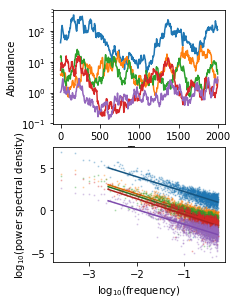

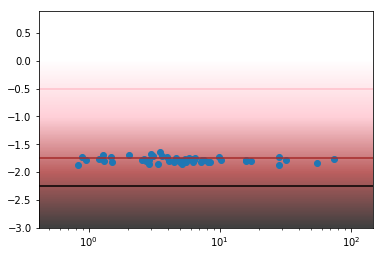

[-1.75E+00 -1.34E+00 -1.37E+00 -1.57E+00 -1.60E+00 -1.35E+00 -1.55E+00
 -1.53E+00 -1.29E+00 -1.46E+00 -1.50E+00 -1.14E+00 -1.39E+00 -1.13E+00
 -1.54E+00 -1.68E+00 -1.69E+00 -1.44E+00 -1.78E+00 -1.15E+00 -1.86E+00
 -1.20E+00 -1.61E+00 -1.52E+00 -1.33E+00 -1.47E+00 -1.19E+00 -1.20E+00
 -1.21E+00 -1.72E+00 -1.64E+00 -1.33E+00 -1.40E+00 -1.33E+00 -1.82E+00
 -1.59E+00 -1.75E+00 -1.62E+00 -1.67E+00 -1.52E+00 -1.60E+00 -1.49E+00
 -1.72E+00 -1.44E+00 -1.28E+00 -1.72E+00 -1.29E+00 -1.51E+00 -1.34E+00
 -1.77E+00]
[7.43E+01 2.99E+00 2.85E+00 6.36E+00 6.28E+00 3.96E+00 5.00E+00 4.48E+00
 2.56E+00 4.65E+00 6.48E+00 1.28E+00 1.47E+00 2.01E+00 5.52E+00 8.38E+00
 5.18E+00 4.72E+00 1.73E+01 9.36E-01 2.85E+01 1.35E+00 7.55E+00 5.79E+00
 2.77E+00 5.40E+00 7.29E-01 9.24E-01 1.50E+00 1.59E+01 6.20E+00 3.59E+00
 3.40E+00 3.46E+00 5.52E+01 7.39E+00 1.60E+01 9.91E+00 1.02E+01 5.10E+00
 7.14E+00 4.11E+00 2.83E+01 4.59E+00 1.22E+00 8.13E+00 3.11E+00 2.85E+00
 2.64E+00 3.22E+01]


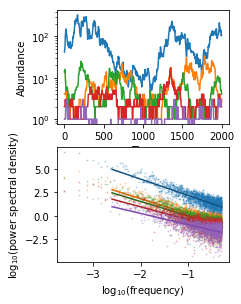

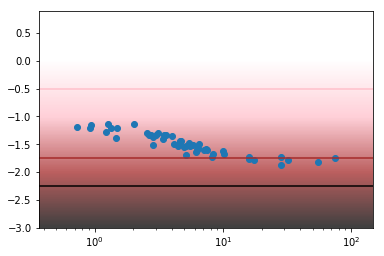

In [177]:
params = {}

N = 50

# no interaction
omega = np.random.normal(0,0.1,[N, N]) * np.random.choice([0,1], [N,N], p=[0.98, 0.02]) 
np.fill_diagonal(omega, -0.02)

params['immigration_rate'] = np.full([N,1], 0.02)

# different growthrates determined by the steady state
g = -np.repeat(0.005, N).reshape([N,1])
params['growthrate'] = g

#steadystate = -np.linalg.inv(omega).dot(g).reshape([N,1])
#steadystate = np.random.normal(10**i, 10**(i-0.5), N).reshape([N,1])
steadystate = np.ones([N,1])
params['interaction_matrix'] = omega #/ steadystate

params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.01,steadystate.shape)

params['noise'] = 3e-1

params['noise_linear'] = 1e-1
params['noise_sqrt'] = 1e-2

params['initial_condition'] = run_timeseries_noise(params, 
                        noise_implementation = NOISE.LANGEVIN_LINEAR,
                        dt = 0.01, tskip=4, T=20.0, seed=int(time.time()), ts=False)

ts = run_timeseries_noise(params, 
                        noise_implementation = NOISE.LANGEVIN_LINEAR,
                        dt = 0.01, tskip=4, T=200.0, seed=int(time.time()))

ts = ts*10

plot_timeseries_comparison([ts], composition=['ts', 'psd'])

slopes = noise_slope(ts)['slope_linear']
means = ts.mean()[1:]
print(slopes.values)
print(means.values)

plt.figure()
plt.scatter(means, slopes)
plt.xscale('log')
x = np.linspace(0.9, -3, 500).reshape([500,1])
plt.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0.5*min(means), 2*max(means), -3, 0.9), aspect='auto', alpha=0.75)
plt.axhline(y=-0.5, c='pink')    
plt.axhline(y=-1.75, c='brown')
plt.axhline(y=-2.25, c='k')
plt.show()

ts = ts.round()

plot_timeseries_comparison([ts], composition=['ts', 'psd'])

slopes = noise_slope(ts)['slope_linear']
means = ts.mean()[1:]
print(slopes.values)
print(means.values)

plt.figure()
plt.scatter(means, slopes)
plt.xscale('log')
x = np.linspace(0.9, -3, 500).reshape([500,1])
plt.imshow(x, cmap=noise_cmap_ww, vmin = noise_lim[0], vmax= noise_lim[1], extent=(0.5*min(means), 2*max(means), -3, 0.9), aspect='auto', alpha=0.75)
plt.axhline(y=-0.5, c='pink')    
plt.axhline(y=-1.75, c='brown')
plt.axhline(y=-2.25, c='k')

plt.show()

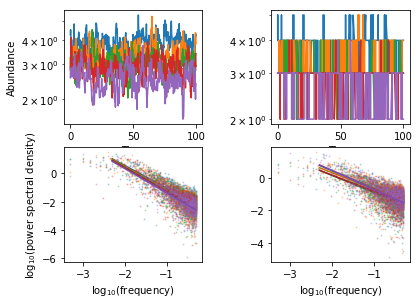

In [115]:
for i in [0.5]: #np.linspace(1.5, 0, 30):
    params = {}

    N = 30
    
    steadystate = np.random.normal(10**i, 10**(i-1), N).reshape([N,1])
    #steadystate = np.logspace(i,i+1.5,N).reshape([N,1])
    #steadystate = np.logspace(-1.5,2,N).reshape([N,1])
    
    # no interaction
    # omega = np.random.normal(0,0.5,[N, N]) * np.random.choice([0,1], [N,N], p=[0.98, 0.02]) 
    omega = np.random.normal(0, 0.05, [N, N])
    np.fill_diagonal(omega, -0.5)

    params['interaction_matrix'] = omega

    # no immigration
    params['immigration_rate'] = np.zeros([N, 1])

    # different growthrates determined by the steady state
    #g = np.random.uniform(0, i, [N,1])
    g = - (omega).dot(steadystate)
    params['growthrate'] = g

    params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.05,steadystate.shape)

    params['noise'] = 2e-1

    params['noise_linear'] = 1e-1
    params['noise_sqrt'] = 1e-2
        
    ts_o = run_timeseries_noise(params, 
                            noise_implementation = NOISE.LANGEVIN_LINEAR,
                            dt = 0.01, tskip=4, T=100.0, seed=int(time.time()))
        
    ts = ts_o.round()
    
    plot_timeseries_comparison([ts_o, ts], composition=['ts', 'psd'])

    slopes = noise_slope(ts)['slope_linear']